# Final Project (Statistics for Data Science with Python)


#### Project Tasks:

Task 1: Familiarize yourself with the dataset 

Task 2: (Optional) If you do not already have an instance of Watson Studio, create an IBM Cloud Lite account and provision an instance of Waston Studio.

Task 3: Load the dataset in a Jupyter Notebook using Watson Studio.

Task 4: Generate basic statistics and visualizations for upper management. 

Task 5: Use the appropriate tests to answer the questions provided.

Task 6: Share your Jupyter Notebook.



In [140]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats
from statsmodels.formula.api import ols
import math

In [141]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [142]:
#print all feature_names
print(boston_df.columns, '\n')

boston_df.head()


Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object') 



,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [143]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000



### Task4. Generate the following and explain your findings:
- For the "Median value of owner-occupied homes" provide a boxplot

- Provide a  bar plot for the Charles river variable

- Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

- Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

- Create a histogram for the pupil to teacher ratio variable

##### Q1: For the "Medina value of owner-occupied homes" provide a boxplot

Text(0.5, 1.0, 'Median of Owner-Occupied Homes')

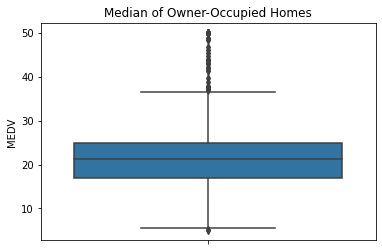

In [144]:
# Median value of owner-occupied homes 
ax = sns.boxplot(y='MEDV', data=boston_df)
#title
ax.set_title('Median of Owner-Occupied Homes')

The boxplot indicates the median value of owner-occupied homes, using the vairable "MEDV"

##### Q2: provide a histogram for the Charles River variable

Text(0.5, 1.0, 'No. of homes near Charles River')

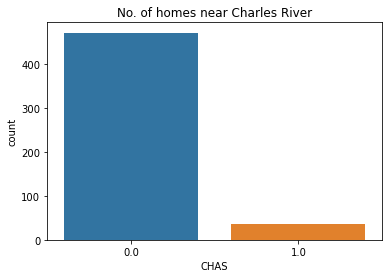

In [145]:
ax = sns.countplot(x = 'CHAS', data=boston_df)
ax.set_title('No. of homes near Charles River')


The above histogram shows majority of people lives near Charles River (1 tract bounds river; 0 otherwise)
 
 

##### Q3. Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [146]:
# age group
boston_df.loc[(boston_df['AGE'] <= 35), 'Age_Group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'Age_Group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = '70 years and older'

Text(0.5, 1.0, 'Median of Owner-Occupied Homes by Age-Group')

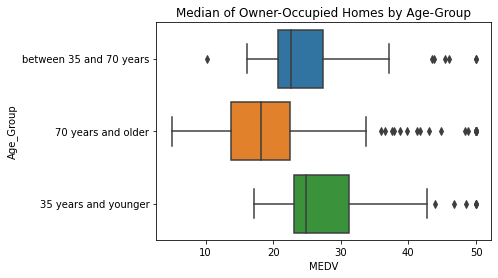

In [147]:
ax = sns.boxplot(x = 'MEDV', y = 'Age_Group', data = boston_df)
ax.set_title('Median of Owner-Occupied Homes by Age-Group')


The boxplot shows the median value of owner-occupied homes according to three age groups, the youngest aging group has higher average median value to occupy own homes.

##### Q4. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Text(0.5, 1.0, 'Nitric oxide concentrations & Proportion of non-retail business acres per town')

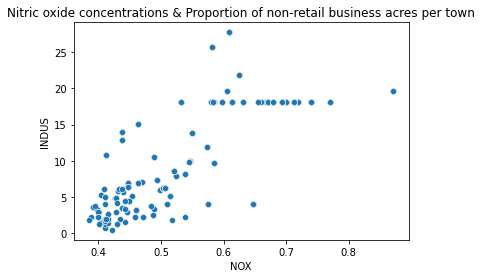

In [148]:
ax = sns.scatterplot(x = 'NOX', y = 'INDUS', data = boston_df)
ax.set_title('Nitric oxide concentrations & Proportion of non-retail business acres per town')

Majority of scatter plots locate at the left bottom area, reflecting the strong relation of low nitric oxide concentrations and low proportion of non-retail business acres per town, and vice versa.

##### Q5. Create a histogram for the pupil to teacher ratio variable

Text(0.5, 1.0, 'Pupil to Teacher ratio')

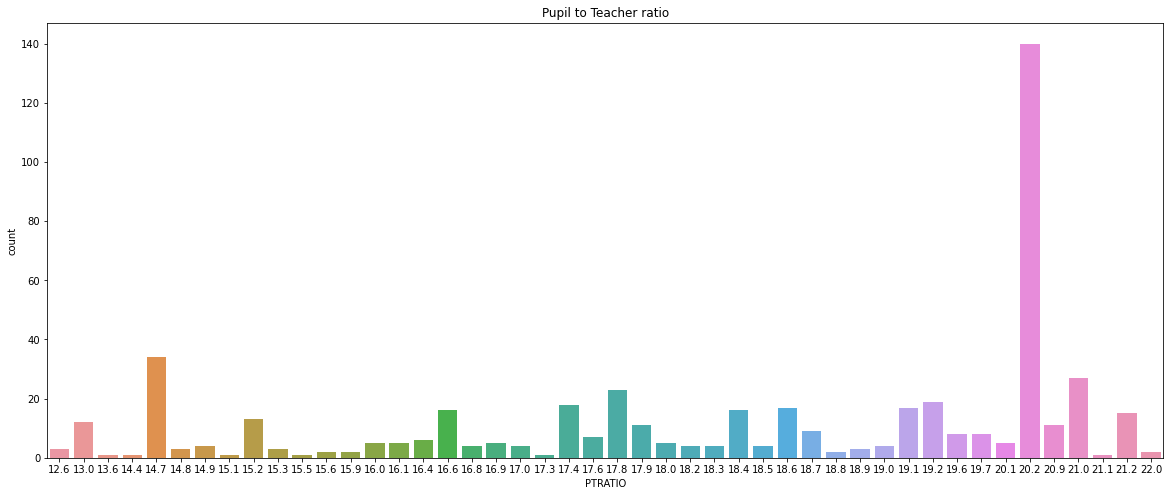

In [149]:
plt.figure(figsize=(20,8)) #width x height
ax = sns.countplot(x = 'PTRATIO', data = boston_df)
ax.set_title('Pupil to Teacher ratio')


From the above histogram, the majority (75%) pupil to teacher ratio lies on 20.2

In [150]:
boston_df['PTRATIO'].describe()

count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: PTRATIO, dtype: float64

### Task 5 Use the appropriate tests to answer the questions provided.
- Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
- Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
- Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
- What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

1. state your hypothesis
2. Use α = 0.05
3. Perform the test Statistics.
4. State the conclusion from the test.

#### Q1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

H0: No significant difference in median value of houses bounded by the Charles river.

H1: A siginificant difference in median value of houses bounded by the Charles river.

In [151]:
boston_df.loc[(boston_df['CHAS']) == 0, 'CHAS_T'] = 'Far_Away'
boston_df.loc[(boston_df['CHAS']) == 1, 'CHAS_T'] = 'Nearby'

In [152]:
res = scipy.stats.ttest_ind(boston_df[boston_df['CHAS_T'] == 'Far_Away']['MEDV'], 
                      boston_df[boston_df['CHAS_T'] == 'Nearby']['MEDV'], equal_var = True)
res

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519902e-05)

In [153]:
#conclusion
alpha = 0.05
print(f'P-value: {res[1]}', end= '\n\n')

if res[1] < alpha:
    print(f'Since p-value is less than {alpha}, we will reject the Null Hypothesis (H0)')
    print('There is a significant difference in median value of houses bounded by the Charles river.')
else:
    print(print(f'Since p-value is greater than {alpha}, we will not reject the Null Hypothesis (H0)'))
    print('There is NO significant difference in median value of houses bounded by the Charles river.')


P-value: 7.390623170519902e-05

Since p-value is less than 0.05, we will reject the Null Hypothesis (H0)
There is a significant difference in median value of houses bounded by the Charles river.


#### Q2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

H0: There is NO difference in Median values of houses for each proportion of owner occupied units build prior to 1940.

H1: There is a difference in Median values of houses for each proportion of owner occupied units build prior to 1940

In [154]:
#ANOVA
#AGE - proportion of owner-occupied units built prior to 1940
lm = ols('MEDV ~ AGE', data=boston_df).fit()
table= sm.stats.anova_lm(lm)
print(table)

             df        sum_sq      mean_sq          F        PR(>F)
AGE         1.0   6069.761065  6069.761065  83.477459  1.569982e-18
Residual  504.0  36646.534350    72.711378        NaN           NaN


**Conclusion**

The PR(>F) represents p-value, the null hypothesis will be reject as it is less than 0.05.
In short, there is a difference in median values for each proportion of owner occupied units build prior to 1940.


#### Q3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

H0: There is **NO** relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

H1: There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town. 


In [155]:
res = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f'correlation coefficient: {res[0]}')
print(f'p-value: {res[1]}')

correlation coefficient: 0.7636514469209157
p-value: 7.913361061233745e-98


In [156]:
#alpha = 0.05
print(f'P-value: {res[1]}', end= '\n\n')

if res[1] < alpha:
    print(f'Since p-value is less than {alpha}, we will reject the Null Hypothesis (H0)')
    print(f'There is a positive correlation (with {res[0]}) between nitric oxide concentrations and proportion of non-retail business acres per town.')
else:
    print(print(f'Since p-value is greater than {alpha}, we will not reject the Null Hypothesis (H0)'))
    print('There is no relationship between nitric oxide concentrations and proportion of non-retail business acres per town. In short, low correlation between two variables.')

P-value: 7.913361061233745e-98

Since p-value is less than 0.05, we will reject the Null Hypothesis (H0)
There is a positive correlation (with 0.7636514469209157) between nitric oxide concentrations and proportion of non-retail business acres per town.


#### Q4. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [157]:
X = boston_df['DIS']
y = boston_df['MEDV']

X = sm.add_constant(X)

#fit model
model = sm.OLS(y, X).fit()
prediction = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 21 Jul 2023   Prob (F-statistic):           1.21e-08
Time:                        00:37:56   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [160]:
# R-squared: 0.062
R = math.sqrt(0.062)
print(f'R-squared = 0.062, by taking square-root of it, R = {R}')

R-squared = 0.062, by taking square-root of it, R = 0.24899799195977465


'MEDV' is the only dependent variable in the regrerssion model.
Coef reflects the change in MEDV (y) for a unit change in DIS (X). It indicates the increase of 5 boston employment centres will result in an increase of 1.0916 median value of owner-occupied homes.
